### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.preprocessing import MultiLabelBinarizer


In [4]:
data=pd.read_csv("/content/anime.csv")

# EDA

In [5]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


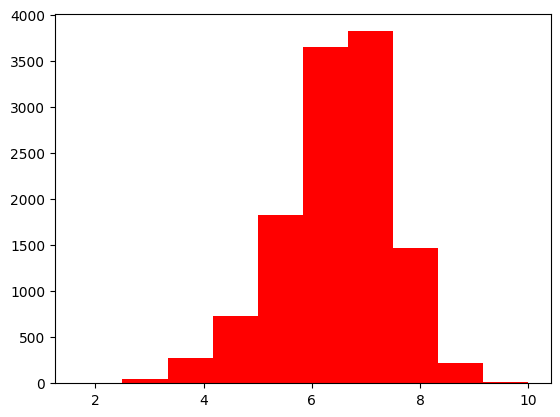

In [7]:
plt.hist(data.rating,facecolor="red")
plt.show()

<Axes: ylabel='count'>

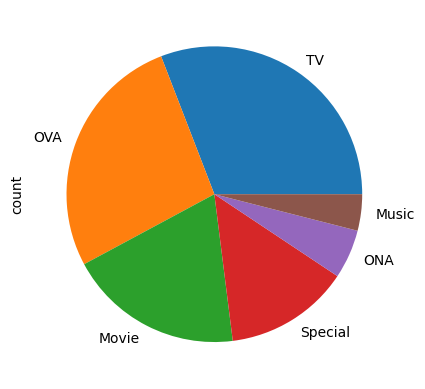

In [8]:
data.type.value_counts().plot(kind="pie")

### Checking for Null values

In [9]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [10]:
data.genre.value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [12]:
len(data.anime_id.unique())

12294

In [13]:
len(data.name.unique())

12292

### Imputing the Null Values

In [14]:
data["rating"].fillna(data["rating"].mean(),inplace=True)

In [15]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,0
members,0


In [16]:
data["genre"].fillna(data["genre"].mode()[0],inplace=True)

In [17]:
data["type"].fillna(data["type"].mode()[0],inplace=True)

### Checking for Duplicates

In [18]:
data[data.duplicated()]

,anime_id,name,genre,type,episodes,rating,members


In [19]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [20]:
#Initializing MultiLabelBinarizer
mlb = MultiLabelBinarizer()

genre_encoded = mlb.fit_transform(data['genre'])

# Converting the encoded array to a DataFrame
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=data.index)


print(genre_encoded_df.head())

# Combining the original dataframe with the encoded genre columns
anime_df = pd.concat([data, genre_encoded_df], axis=1)

      ,  -  A  C  D  E  F  G  H  ...  n  o  p  r  s  t  u  v  w  y
0  1  1  0  0  0  1  0  0  0  0  ...  1  1  1  1  0  1  1  0  0  0
1  1  1  0  1  0  1  0  1  0  0  ...  1  1  0  1  1  1  1  1  0  1
2  1  1  1  1  1  0  0  1  0  1  ...  1  1  0  1  1  1  1  0  0  1
3  1  1  1  0  0  0  0  1  0  0  ...  0  0  0  1  0  0  0  0  0  0
4  1  1  1  1  1  0  0  1  0  1  ...  1  1  0  1  1  1  1  0  0  1

[5 rows x 41 columns]


In [21]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalizing the numerical features 'rating' and 'members'
scaler = StandardScaler()
data[['rating', 'members']] = scaler.fit_transform(data[['rating', 'members']])

In [23]:
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,2.847535,3.330241
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,2.739380,14.148406
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,2.729547,1.754713
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,2.650889,11.957666
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,2.641057,2.429742
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,-2.284933,-0.325809
12290,5543,Under World,Hentai,OVA,1,-2.157113,-0.326320
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,-1.567174,-0.325663
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,-1.468851,-0.326466


In [24]:
anime_features = pd.concat([data[['rating', 'members']], genre_encoded_df], axis=1)

In [25]:
anime_features

,rating,members,,",",-,A,C,D,E,F,...,n,o,p,r,s,t,u,v,w,y
0,2.847535,3.330241,1,1,0,0,0,1,0,0,...,1,1,1,1,0,1,1,0,0,0
1,2.739380,14.148406,1,1,0,1,0,1,0,1,...,1,1,0,1,1,1,1,1,0,1
2,2.729547,1.754713,1,1,1,1,1,0,0,1,...,1,1,0,1,1,1,1,0,0,1
3,2.650889,11.957666,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2.641057,2.429742,1,1,1,1,1,0,0,1,...,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,-2.284933,-0.325809,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
12290,-2.157113,-0.326320,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
12291,-1.567174,-0.325663,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
12292,-1.468851,-0.326466,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [32]:

anime_df['genre'] = anime_df['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else ['Unknown'])
anime_df['genre_str'] = anime_df['genre'].apply(lambda x: ' '.join(x))



### Applying the Cosine Similarity

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(anime_features)

In [34]:
def get_recommendations(title, data, cosine_sim):
    #To Get the index of the anime that matches the title
    idx = data[data['name'] == title].index[0]


    sim_scores = list(enumerate(cosine_sim[idx]))


    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar anime (excluding the input anime itself)
    sim_indices = [i[0] for i in sim_scores[1:11]]

    # Return the top 10 most similar anime
    return data['name'].iloc[sim_indices]


### Checking Example

In [35]:
recommended_anime = get_recommendations('Violence Gekiga David no Hoshi', data, cosine_sim)
print(recommended_anime)

12238    Wake Up! Aria: Majokko Virgin Kiki Ippatsu
12237                           Henbou Moral Hazard
7824                                      PiKA PiKA
12236                     Youbi Masochist Animation
12235                                         Yayoi
12234                                Maid Meshimase
12256                                     Happy Day
12283                          Silent Chaser Kagami
7876                                       Zawazawa
12239             Sei Michaela Gakuen Hyouryuuki II
Name: name, dtype: object


## Evaluation

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(anime_df, test_size=0.2, random_state=42)

# Function to evaluate recommendations
def evaluate_recommendations(test_df, anime_df, cosine_sim):
    precision_list = []
    recall_list = []
    f1_list = []

    for idx, row in test_df.iterrows():
        anime_name = row['name']

        # Actual similar anime based on genre
        actual_similar = set(anime_df[anime_df['genre_str'] == row['genre_str']]['name'])

        # To Get recommended anime using the recommendation function
        recommended_anime = set(get_recommendations(anime_name, anime_df, cosine_sim))

        # Calculate true positives
        true_positives = len(actual_similar & recommended_anime)

        # Precision: True Positives / Recommended Anime
        precision = true_positives / len(recommended_anime) if len(recommended_anime) > 0 else 0

        # Recall: True Positives / Actual Similar Anime
        recall = true_positives / len(actual_similar) if len(actual_similar) > 0 else 0


        precision_list.append(precision)
        recall_list.append(recall)

    # Average precision and recall
    avg_precision = sum(precision_list) / len(precision_list) if precision_list else 0
    avg_recall = sum(recall_list) / len(recall_list) if recall_list else 0

    # F1 Score calculation
    if avg_precision + avg_recall > 0:
        f1_score_result = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
    else:
        f1_score_result = 0

    return avg_precision, avg_recall, f1_score_result

# Call the evaluation function
precision, recall, f1 = evaluate_recommendations(test_df, anime_df, cosine_sim)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Precision: 0.5764, Recall: 0.3061, F1 Score: 0.3999
